# Relatório - Análise de reclamações do Procon

## Descrição do problema

<a id='description'></a>
Utilizando o framework de análise descrito em aula e as técnicas de visualização apropriadas, será realizada uma análise sobre o *[dataset de reclamações do procon](https://www.kaggle.com/gerosa/procon/data)*. 

**O intuito da análise é descobrir quais são as empresas mais odiadas pelos consumidores.**


Primeiramente, devemos pensar mais sobre a questão em si: **o que leva o consumidor a ter uma opinião negativa acerca de uma empresa?**

Podemos levantar algumas hipóteses:

- Os clientes tem problemas frequentes com aquela empresa
- A empresa não é capaz de resolver o problema do consumidor
- Há uma demora na resolução da reclamação

Diante dessas suposições, estabelecemos algumas métricas para medir o desempenho das empresas:

- Frequência de reclamações
- Porcentagem de reclamações atendidas
- Tempo médio entre a abertura e o arquivamento das reclamações

Além disso, se realizarmos uma avaliação setorial, obteremos mais informações a respeito de quais problemas são mais frequentes para os consumidores.

## Caracterização inicial dos datasets

Com a nossa problemática já bem definida, agora precisamos entender melhor como nossos dados estão estruturados antes de explorá-los.

### Configuração do ambiente

Vamos carregar as bibliotecas necessárias para trabalhar com as nossas bases de dados para, então, ler nossos *datasets*.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_path = '../data/'
plot_path = '../plots/'

In [28]:
procon12 = pd.read_csv(data_path + 'reclamacoes-2012.csv')
procon13 = pd.read_csv(data_path + 'reclamacoes-2013.csv')
procon14 = pd.read_csv(data_path + 'reclamacoes-2014.csv')
procon15 = pd.read_csv(data_path + 'reclamacoes-2015.csv')
procon16 = pd.read_csv(data_path + 'reclamacoes-2016.csv')

C:\Users\Joaquim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Definição de funções auxiliares

Para manter nosso código mais limpo, vamos definir algumas funções.

In [29]:
def plot_routine(title='', xlabel='', ylabel='', file=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(plot_path + file)
    
def table_stemming(lexic, table):
    stemmed_lexic = []

    for words in lexic:
        a = ''
        null_str = ''
    
        for string in words:
            if string in table:
                if a == '':
                    a = string
                else:
                    a = a + ' ' + string
            else:
                if null_str == '':
                    null_str = string
                else:
                    null_str = null_str + ' ' + string
    
        if a == '':
            stemmed_lexic.append(null_str)
        else:
            stemmed_lexic.append(a)
            
    return stemmed_lexic

### Identificação dos headers de cada dataset

Vamos olhar o nome e tipo das colunas de cada *dataset*, para ter certeza de que estamos com o arquivo correto e de que o mesmo está seguindo a especificação que está no *Kaggle*.

In [30]:
procon12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211076 entries, 0 to 211075
Data columns (total 23 columns):
AnoCalendario            211076 non-null int64
DataArquivamento         211076 non-null object
DataAbertura             211076 non-null object
CodigoRegiao             211076 non-null int64
Regiao                   211076 non-null object
UF                       211076 non-null object
strRazaoSocial           211076 non-null object
strNomeFantasia          172723 non-null object
Tipo                     211076 non-null int64
NumeroCNPJ               200875 non-null float64
RadicalCNPJ              200324 non-null float64
RazaoSocialRFB           200214 non-null object
NomeFantasiaRFB          90245 non-null object
CNAEPrincipal            200214 non-null float64
DescCNAEPrincipal        196250 non-null object
Atendida                 211076 non-null object
CodigoAssunto            211076 non-null int64
DescricaoAssunto         211076 non-null object
CodigoProblema           21

In [31]:
procon13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268096 entries, 0 to 268095
Data columns (total 23 columns):
AnoCalendario            268096 non-null int64
DataArquivamento         268096 non-null object
DataAbertura             268096 non-null object
CodigoRegiao             268096 non-null int64
Regiao                   268096 non-null object
UF                       268096 non-null object
strRazaoSocial           268096 non-null object
strNomeFantasia          218488 non-null object
Tipo                     268096 non-null int64
NumeroCNPJ               257056 non-null float64
RadicalCNPJ              257056 non-null float64
RazaoSocialRFB           256038 non-null object
NomeFantasiaRFB          119663 non-null object
CNAEPrincipal            251976 non-null float64
DescCNAEPrincipal        251976 non-null object
Atendida                 268096 non-null object
CodigoAssunto            268096 non-null int64
DescricaoAssunto         268096 non-null object
CodigoProblema           2

In [32]:
procon14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267764 entries, 0 to 267763
Data columns (total 23 columns):
AnoCalendario            267764 non-null int64
DataArquivamento         267764 non-null object
DataAbertura             267764 non-null object
CodigoRegiao             267764 non-null int64
Regiao                   267764 non-null object
UF                       267764 non-null object
strRazaoSocial           267764 non-null object
strNomeFantasia          226691 non-null object
Tipo                     267764 non-null int64
NumeroCNPJ               256993 non-null float64
RadicalCNPJ              256416 non-null float64
RazaoSocialRFB           255312 non-null object
NomeFantasiaRFB          124393 non-null object
CNAEPrincipal            255312 non-null float64
DescCNAEPrincipal        251926 non-null object
Atendida                 267764 non-null object
CodigoAssunto            267764 non-null int64
DescricaoAssunto         267764 non-null object
CodigoProblema           2

In [33]:
procon15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255650 entries, 0 to 255649
Data columns (total 23 columns):
AnoCalendario            255650 non-null int64
DataArquivamento         255650 non-null object
DataAbertura             255650 non-null object
CodigoRegiao             255650 non-null int64
Regiao                   255650 non-null object
UF                       255650 non-null object
strRazaoSocial           255645 non-null object
strNomeFantasia          215012 non-null object
Tipo                     255650 non-null int64
NumeroCNPJ               243302 non-null float64
RadicalCNPJ              243302 non-null float64
RazaoSocialRFB           238591 non-null object
NomeFantasiaRFB          120777 non-null object
CNAEPrincipal            238591 non-null float64
DescCNAEPrincipal        236325 non-null object
Atendida                 255650 non-null object
CodigoAssunto            255650 non-null int64
DescricaoAssunto         255650 non-null object
CodigoProblema           2

In [34]:
procon16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 23 columns):
AnoCalendario            203486 non-null int64
DataArquivamento         203486 non-null object
DataAbertura             203486 non-null object
CodigoRegiao             203486 non-null int64
Regiao                   203486 non-null object
UF                       203486 non-null object
strRazaoSocial           203483 non-null object
strNomeFantasia          173722 non-null object
Tipo                     203486 non-null int64
NumeroCNPJ               195292 non-null float64
RadicalCNPJ              195292 non-null float64
RazaoSocialRFB           187287 non-null object
NomeFantasiaRFB          92561 non-null object
CNAEPrincipal            187287 non-null float64
DescCNAEPrincipal        185784 non-null object
Atendida                 203486 non-null object
CodigoAssunto            203486 non-null int64
DescricaoAssunto         203486 non-null object
CodigoProblema           20

Tendo confirmado que os *datasets* estão com os headers padronizados, podemos juntá-los em um único *dataframe*.

In [35]:
dataset = pd.concat([procon12, procon13, procon14, procon15, procon16], ignore_index=True)

#### Header Metadata

Vamos também listar a definição de cada coluna para entendermos melhor com quais iremos trabalhar mais tarde.

<div class="alert alert-block alert-info">

- **AnoCalendario** : Ano de referência
- **DataArquivamento** : Data de arquivamento da reclamação
- **DataAbertura** : Data de abertura da reclamação
- **CodigoRegiao** : 1 - Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste
- **Regiao** : Nome da região
- **UF** : Estado
- **strRazaoSocial** : Razão social da empresa (Base de dados do Procon)
- **strNomeFantasia** : Nome fantasia da empresa (Base de dados do Procon)
- **Tipo** : 1 - Jurídica, 0 - Física
- **NumeroCNPJ** : CNPJ completo
- **RadicalCNPJ** : Primeiros 8 dígitos do CNPJ
- **RazaoSocialRFB** : Razão social da empresa (Base de dados do Governo)
- **NomeFantasiaRFB** : Nome fantasia da empresa (Base de dados do Governo)
- **CNAEPrincipal** : Código de Atividade Econômica da empresa *([Mais informações](https://cnae.ibge.gov.br/))*
- **DescCNAEPrincipal** : Descrição da Atividade Econômica da Empresa
- **Atendida** : Indica se a reclamação foi atendida
- **CodigoAssunto** : Código do assunto da reclamação
- **DescricaoAssunto** : Descrição do assunto da reclamação
- **CodigoProblema** : Código do problema relatado
- **DescricaoProblema** : Descrição do problema relatado
- **SexoConsumidor** : M - Masculino, F - Feminino
- **FaixaEtariaConsumidor** : Faixa etária do consumidor
- **CEPConsumidor** : Código postal do consumidor

### Pré-processamento

Vamos preparar nossos dados para as análises.

#### Qual a melhor coluna para identificar as empresas?

Temos algumas formas de identificarmos as empresa: seja pelo CNPJ, pela razão social ou pelo nome fantasia, tanto pela base de dados do procon, quanto pela base de dados do governo. Vamos descobrir qual é a melhor.

Queremos a coluna que agrupe as reclamações das empresas o máximo possível. Ou seja, vamos escolher aquela que menos tenha valores nulos e mais tenha as reclamações de um mesmo grupo com um valor único.

In [36]:
total_reclamacoes = dataset.shape[0]

In [37]:
melhor_coluna = dataset.filter(['NumeroCNPJ', 'strRazaoSocial', 'strNomeFantasia', 'RazaoSocialRFB', 'NomeFantasiaRFB'])
melhor_coluna.count()
melhor_coluna.nunique()

1 - ((melhor_coluna.nunique() + (total_reclamacoes - melhor_coluna.count()))/total_reclamacoes)

NumeroCNPJ         0.882020
strRazaoSocial     0.899140
strNomeFantasia    0.763573
RazaoSocialRFB     0.885154
NomeFantasiaRFB    0.417665
dtype: float64

In [38]:
melhor_coluna = pd.DataFrame({
    'nulos' : {
        'CNPJ' : total_reclamacoes - dataset['NumeroCNPJ'].count(),
        'RazaoSocialRFB' : total_reclamacoes - dataset['RazaoSocialRFB'].count(), 
        'NomeFantasiaRFB' : total_reclamacoes - dataset['NomeFantasiaRFB'].count(), 
        'strRazaoSocial' : total_reclamacoes - dataset['strRazaoSocial'].count(), 
        'strNomeFantasia' : total_reclamacoes - dataset['strNomeFantasia'].count()
    },

    'unicos' : {
        'CNPJ' : len(dataset['NumeroCNPJ'].unique()),
        'RazaoSocialRFB' : len(dataset['RazaoSocialRFB'].unique()), 
        'NomeFantasiaRFB' : len(dataset['NomeFantasiaRFB'].unique()), 
        'strRazaoSocial' : len(dataset['strRazaoSocial'].unique()), 
        'strNomeFantasia' : len(dataset['strNomeFantasia'].unique())
    }
})

In [39]:
1 - ((melhor_coluna['unicos'] + melhor_coluna['nulos'])/total_reclamacoes)

CNPJ               0.882019
NomeFantasiaRFB    0.417664
RazaoSocialRFB     0.885153
strNomeFantasia    0.763572
strRazaoSocial     0.899140
dtype: float64

De acordo com os resultados, utilizaremos a coluna ```strRazaoSocial``` para identificar as empresas daqui para frente. Podemos, portanto, tornar nosso *dataset* mais leve ao retirar a informação duplicada da nossa base de dados.

In [40]:
lean_dataset = dataset.drop(['NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB', 'strNomeFantasia'], axis=1)

#### Tratando o nome das empresas

Agora que decidimos qual coluna utilizar, vamos tratar aspectos dos nomes que podem nos atrapalhar na hora de identificar a qual empresa percente uma reclamação, como variações de acentuação, pontuação e *stop-words* comuns em nomes de empresas *(i.e. LTDA., S/A)*.

In [41]:
regras = [
    ('\.+', ''), 
    ('/', ''), 
    ('\s{1}-', ''), 
    ('`+', ''), 
    ('´+', ''), 
    ('\'+', ''), 
    ('\"+', ''), 
    ('\(+', ''), 
    ('\)+', ''), 
    ('\[+', ''), 
    ('\]+', ''), 
    ('\{+', ''), 
    ('\}+', ''), 
    ('\s{1}SA$', ''), 
    ('\s{1}SA\s{1}', ''), 
    ('\s{1}LTD$', ''), 
    ('LTD\s{1}', ''), 
    ('\s{1}LTDA$', ''), 
    ('\s{1}LTDA\s{1}', ''), 
    ('\s{1}INC$', ''), 
    ('\s{1}INC\s{1}', ''), 
    ('\s{1}ME$', ''), 
    ('\s{1}ME\s{1}', ''),
    ('\s{1}E\s{1}'. ' ')
    ('Ã|Á', 'A'), 
    ('É|Ê', 'E'),  
    ('Í', 'I'), 
    ('Õ|Ô|Ó', 'O'), 
    ('Ú', 'U'), 
    ('Ç', 'C')
]

for pattern, replace in regras:
    lean_dataset['strRazaoSocial'] = lean_dataset['strRazaoSocial'].str.replace(pattern, replace)

In [42]:
unicos = lean_dataset['strRazaoSocial'].unique()
1 - (len(unicos) + melhor_coluna['nulos']['strRazaoSocial'])/total_reclamacoes

0.9087384501091146

Conseguimos melhorar um pouco o agrupamento das nossas empresas, mas ainda podemos melhorar isso se fizermos uso de um ```stemmer```. Faremos uso da coluna ```strNomeFantasia``` para servir de tabela de comparação para remoção de eventuais palavras não desejadas.

In [43]:
for pattern, replace in regras:
    nome_fantasia = dataset['strNomeFantasia'].str.replace(pattern, replace)

In [44]:
stemmer = set()
lexic = lean_dataset['strRazaoSocial'].dropna().str.split()

for empresa in nome_fantasia.dropna().str.split():
    for string in empresa:
        stemmer.add(string)
        
lean_dataset['strRazaoSocial'] = pd.Series(table_stemming(lexic, stemmer))

In [156]:
unicos = lean_dataset['strRazaoSocial'].unique()
1 - (len(unicos) + melhor_coluna['nulos']['strRazaoSocial'])/total_reclamacoes

0.9178382385131236

Pronto, agora temos um desempenho ainda melhor na coluna ```strRazaoSocial```. Poderíamos aplicar mais técnicas, porém correríamos o risco de perder a essência das informações contidas em cada nome, portanto iremos parar por aqui.

#### Transformando as datas

Durante a identificação dos headers, observamos que as colunas ```DataAbertura``` e ```DataArquivamento``` estavam sendo lidas como ```string```. No entanto, para trabalhar com elas é ideal que elas sejam objetos ```datetime```. Faremos, portanto, essa mudança agora.

In [46]:
lean_dataset['DataAbertura'] = pd.to_datetime(lean_dataset['DataAbertura'], format="%Y-%m-%d %H:%M:%S.%f")
lean_dataset['DataArquivamento'] = pd.to_datetime(lean_dataset['DataArquivamento'], format="%Y-%m-%d %H:%M:%S.%f")

## Exploração dos datasets

Finalmente, estamos prontos para começar a explorar os nossos dados. **Relembrando: estamos interessados em descobrir as empresas mais odiadas.**

In [105]:
setores = lean_dataset.groupby(['DescCNAEPrincipal', 'AnoCalendario']).size().to_frame('freq').reset_index()

In [93]:
setores = lean_dataset.groupby(['DescCNAEPrincipal', 'AnoCalendario']).size()

In [106]:
setores = setores.set_index(['DescCNAEPrincipal', 'AnoCalendario']).freq

In [108]:
setores = setores.unstack(fill_value=0)

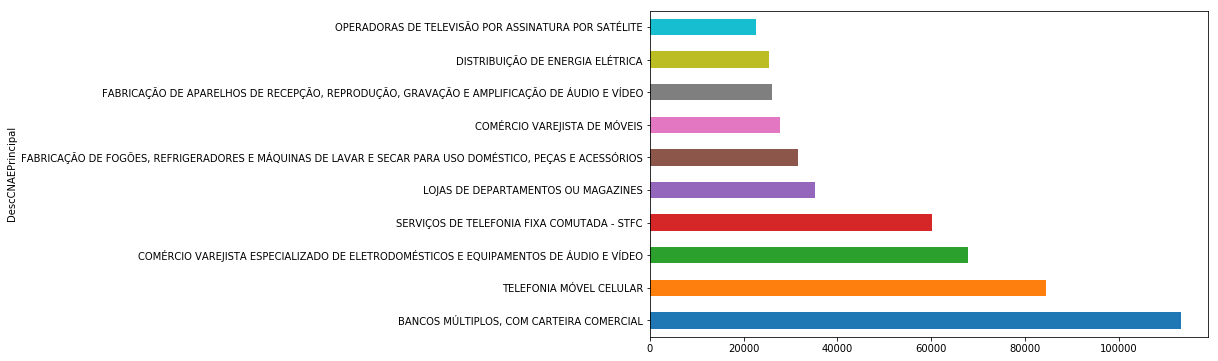

In [154]:
setores.stack().unstack(level=0).sum().sort_values(ascending=False)[:10].plot(
    kind='barh',
    figsize=(10,6)
)

In [150]:
sns.factorplot(data=setores, y=setores.values, x=setores.keys, col=setores.columns)

TypeError: keys() takes 1 positional argument but 2 were given

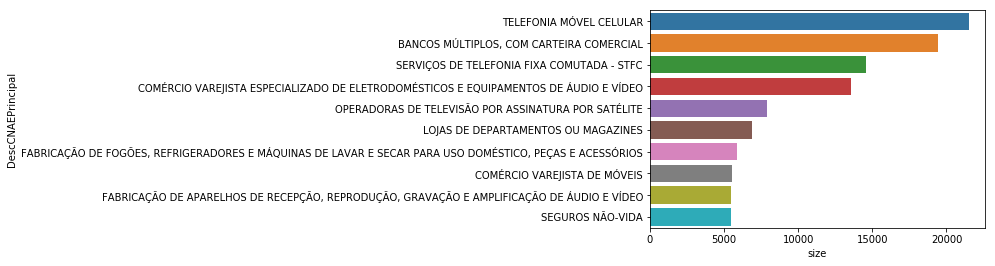

In [172]:
setores2012 = setores[setores['AnoCalendario'] == 2015].nlargest(10,'size')
sns.barplot(setores2012['size'], setores2012['DescCNAEPrincipal'], orient='h')